# Анализ интернет-магазина по продаже продуктов питания

## Загрузка данных и подготовка их к анализу.

### Импортируем нужные модули.

In [ ]:
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Загрузим данные.

1. C помощью библиотеки os и проверкой на правильности пути файла, загрузим данные с помощью функции read_csv().

In [ ]:
path = '/datasets/logs_exp.csv'

if os.path.exists(path):
    data = pd.read_csv(path, sep='\t')
else:
    print('Something is wrong')

2. Выведем для наглядности всю таблицу.

In [ ]:
data.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


3. Выведем основную информацию о столбцах таблицы.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


**Вывод:** после выгрузки файла можем сделать вывод, что таблица состоит из четырех полей и 244126 записей. Уже можем заметить, что названия столбцов написаны неверно, столбец 'EventTimestamp' стоит привести в формат даты и времени, датафрейм стоит проверить на наличие пропусков и дубликатов.

### Предобработка данных.

1. Заменим название столбцов на правильный формат. Сделаем это с помощью метода rename().

In [ ]:
data = data.rename(columns={'EventName':'event_name', 'DeviceIDHash':'device_id_hash','EventTimestamp':'event_timestamp','ExpId':'exp_id'})

In [ ]:
data

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


2. Проверим датафрейм на наличие дубликатов.

In [ ]:
data.duplicated().sum()

413

**Вывод:** в датафрейме 413 дубликатов, не такое большое количество, поэтому можем их удалить.

3. С помощью функции drop_duplicates() удаляем дубликаты из датафрейма.

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)

4. Проверим таблица на наличие пропусков.

In [ ]:
data.isna().sum()

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

**Вывод:** в датафрейме пропуски отсутствуют.

### Добавление новых столбцов в таблицу.

1. Добавим новый столбец, в котором будет показана дата совершенной операции.

In [ ]:
data['event_datetime'] = pd.to_datetime(data['event_timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
data

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42
...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25
243709,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59
243710,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43
243711,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58


2. Добавим новый столбец, в котором будет показана дата совершенной операции.

In [ ]:
data['event_date'] = pd.to_datetime(data['event_timestamp'], unit='s').dt.strftime('%Y-%m-%d')

In [ ]:
data

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
243709,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
243710,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
243711,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


3. Выведем общую информацию о таблице.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       243713 non-null  object
 1   device_id_hash   243713 non-null  int64 
 2   event_timestamp  243713 non-null  int64 
 3   exp_id           243713 non-null  int64 
 4   event_datetime   243713 non-null  object
 5   event_date       243713 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.2+ MB


**Вывод:** тип данных новых столбцов с датами: 'object', необходимо их заменить в тип данных времени.

4. Воспользуемся методом astype() и изменим тип данных с 'object' на 'datetime64'.

In [ ]:
data['event_datetime'] = data['event_datetime'].astype('datetime64[ns]')
data['event_date'] = data['event_date'].astype('datetime64[ns]')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   device_id_hash   243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   exp_id           243713 non-null  int64         
 4   event_datetime   243713 non-null  datetime64[ns]
 5   event_date       243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


**Общий вывод по разделу:** в данном разделе мы загрузили основной датафрейм, предобработали его: изменили названия столбцов на правильный формат, удалили дубликаты, проверили на пропуски, которых не было. Добавили два новых столбца: с датой и временем и датой, изменили . Датасет готовы для дальнейшего анализа.

## Изучение и проверка данных.

### Сколько всего событий в логе?

1. Чтобы проверить сколько всего уникальных событий в логе, воспользуемся методом unique().

In [ ]:
data['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

**Вывод:** всего в датафрейме 5 уникальных видов событий.

2. Узнаем, общее количество событий в логе.

In [ ]:
data['event_name'].count()

243713

**Вывод:** всего в датафрейме было совершено 243713 событий.

### Сколько всего пользователей в логе?

1. С помощью метода unique().size узнаем сколько уникальных пользователей было в логе.

In [ ]:
data['device_id_hash'].unique().size

7551

**Вывод:** всего в датафрейме 7551 уникальный пользователь.

### Сколько в среднем событий приходится на пользователя?

1. Создадим новую переменную и сгруппируем по столбцу 'device_id_hash'. Таким образом, мы сможем узнать количество событий каждого пользователя.

In [ ]:
count_events = data.groupby('device_id_hash').agg({'device_id_hash':'count'})
count_events.rename(columns={'device_id_hash':'count_events'})

,count_events
device_id_hash,
6888746892508752,1
6909561520679493,5
6922444491712477,47
7435777799948366,6
7702139951469979,137
...,...
9217594193087726423,9
9219463515465815368,17
9220879493065341500,7


2. C помощью метода median() узнаем медиану в столбце 'count_events'.

In [ ]:
count_events.median()

device_id_hash    20.0
dtype: float64

**Вывод:** в среднем на одного пользователя приходится 20 событий.

### Данными за какой период мы располагаем?

1. С помощью метода min() узнаем с какого числа учитываются данные.

In [ ]:
data['event_date'].min()

Timestamp('2019-07-25 00:00:00')

2. С помощью метода max() узнаем по какое число учитываются данные.

In [ ]:
data['event_date'].max()

Timestamp('2019-08-07 00:00:00')

**Вывод:** мы обладаем данными с 25 июля 2019 года по 7 августа 2019 года.

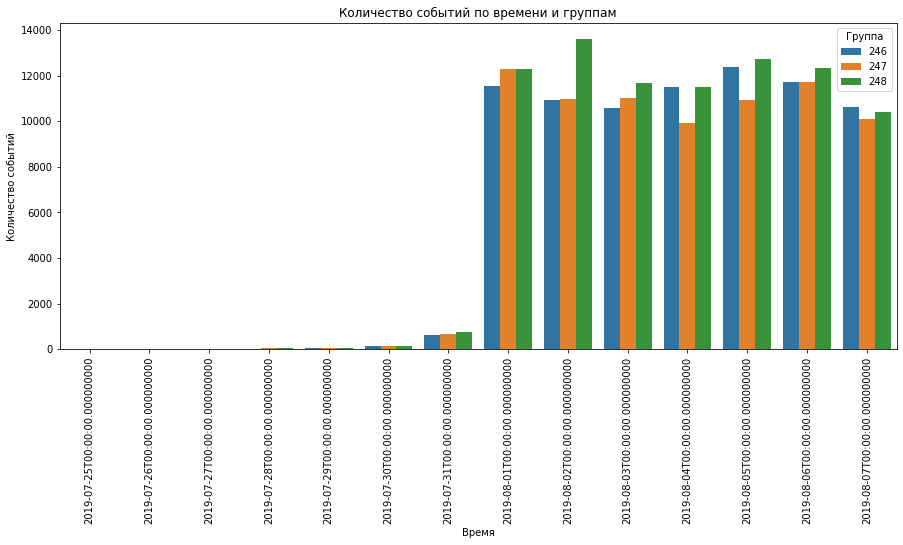

In [ ]:
# Группируем данные по столбцам 'timestamp' и 'group' и вычисляем количество событий
event_counts = data.groupby(['event_date', 'exp_id']).size().reset_index(name='count')

# Создаем столбчатую диаграмму с использованием Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='event_date', y='count', hue='exp_id', data=event_counts)

plt.title('Количество событий по времени и группам')
plt.xlabel('Время')
plt.ylabel('Количество событий')
plt.xticks(rotation=90)

plt.legend(title='Группа', loc='upper right')
plt.show()

**Вывод:** по графику видно, с 25 июля 2019 по 31 июля 2019 года не так много данных, можно предположить, что эти данные из прошлого анализа, с июля месяца. Они нам не нужны, поэтому их нужно будет удалить.

3. С помощью фильтрации удаляем из датафрейма строки с датами начиная от 2019-07-25 до 2019-08-01.

In [ ]:
# Сохраним количество строк в исходном DataFrame
original_rows = len(data)

# Применим фильтр для удаления данных в заданном периоде времени
data = data[(data['event_date'] < '2019-07-25') | (data['event_date'] >= '2019-08-01')].reset_index(drop=True)

# Сохраним количество строк в отфильтрованном DataFrame
filtered_rows = len(data)

# Выведем количество удаленных строк
deleted_rows = original_rows - filtered_rows
print(f'Было удалено {deleted_rows} строк')

Было удалено 2826 строк


**Вывод:** из датафрейма было удалено 2826 строк с неактуальными данными.

4. Построим вновь столбчатый график с количеством событий по времени и группам.

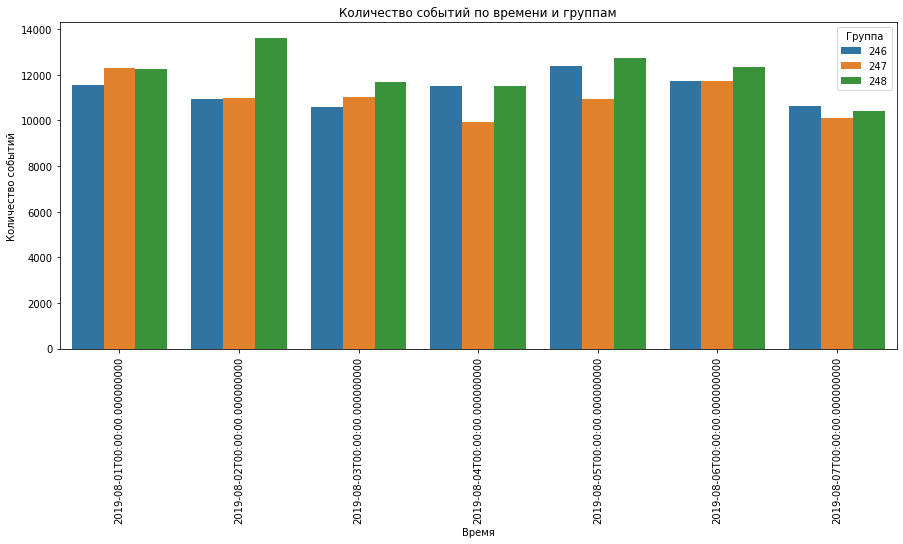

In [ ]:
# Группируем данные по столбцам 'timestamp' и 'group' и вычисляем количество событий
event_counts = data.groupby(['event_date', 'exp_id']).size().reset_index(name='count')

# Создаем столбчатую диаграмму с использованием Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='event_date', y='count', hue='exp_id', data=event_counts)

plt.title('Количество событий по времени и группам')
plt.xlabel('Время')
plt.ylabel('Количество событий')
plt.xticks(rotation=90)

plt.legend(title='Группа', loc='upper right')
plt.show()

**Вывод:** на самом деле мы располагаем данными с 1 августа 2019 года по 7 августа 2019 года. Неактуальные данные были удалены. Мы располагаем данными о пользователях из всех трех групп.

**Общий вывод по разделу:** в данном разделе мы узнали сколько всего уникальных событий в логе - 5; Сколько уникальных пользователей в логах - 7551 пользователь; Сколько в среднем событий приходится на пользователя - 32 события; Нашли максимальную и минимальную дату в наших логах: 2019-07-25 и 2019-08-07; Определили, что с 2019-08-01 данные полные и отбросили 2826 строк с более старыми логами.

## Изучение воронки событий.

### Посмотрим, какие события есть в логах, как часто они встречаются.

1. Как ранее было сказано, всего в датафрейме 5 уникальных событий. Узнаем, как часто они встречаются.

In [ ]:
event_counts = data.groupby('event_name').agg({'event_name':'count'})
event_counts = event_counts.rename(columns={'event_name':'event_counts'})
event_counts.sort_values(by='event_counts', ascending=False)

,event_counts
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


2. Для наглядности построим круговую диаграмму.

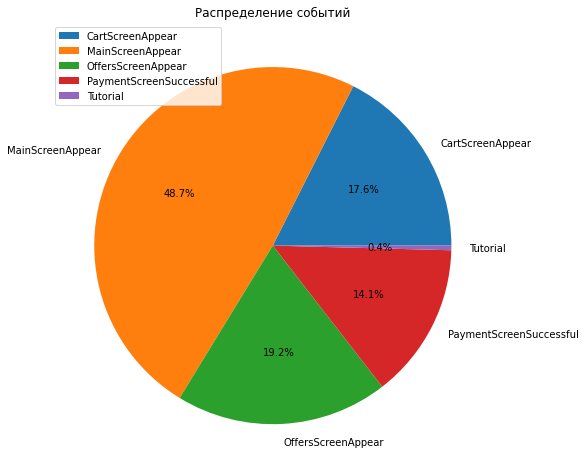

In [ ]:
event_counts = data.groupby('event_name').agg({'event_name':'count'})

# Строим круговую диаграмму на основе группировки
event_counts.plot(kind='pie', y='event_name', autopct='%1.1f%%', figsize=(8, 12))

plt.title('Распределение событий')
plt.ylabel('')

plt.show();

**Вывод:** по графику можем наблюдать, что 48.7% (117328) событий связаны с заходом на главную страницу сайта; 19.2% (46333) - связаны с переходам на страницу с предложениями; 17.6% (42303) - связаны с заходом на страницу с корзиной; 14.1% (33918) - связаны с переходом на страницу оплаты товаров; 0.4% (1005) - связаны с заходом на страницу с обучением, как пользоваться сайтом.

### Посчитаем, сколько пользователей совершали каждое из этих событий.

1. С помощью группировки узнаем, сколько пользователей совершали каждой событие.

In [ ]:
event_counts_user = data.groupby('event_name').agg({'event_name':'count', 'device_id_hash':'nunique'})
event_counts_user = event_counts_user.rename(columns={'device_id_hash':'user_counts', 'event_name':'event_counts'})
event_counts_user = event_counts_user.sort_values(by='user_counts', ascending=False)
event_counts_user

,event_counts,user_counts
event_name,,
MainScreenAppear,117328,7419
OffersScreenAppear,46333,4593
CartScreenAppear,42303,3734
PaymentScreenSuccessful,33918,3539
Tutorial,1005,840


2. Для наглядности построим круговую диаграмму.

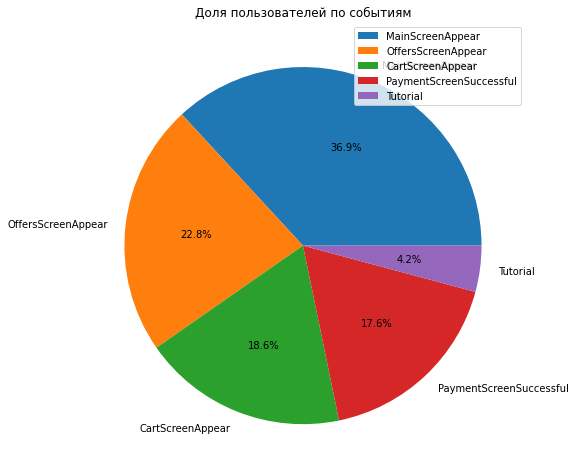

In [ ]:
# Строим круговую диаграмму на основе группировки
event_counts_user.plot(kind='pie', y='user_counts', autopct='%1.1f%%', figsize=(8, 12))

plt.title('Доля пользователей по событиям')
plt.ylabel('')
plt.show();

**Вывод:** по графику можем наблюдать, что 36.9% (7419) пользователей перешли на главную страницу сайта; 22.8% (4593) - пользователей перешли на страницу с предложениями; 18.6% (3734) - пользователей перешли на страницу с корзиной; 17.6% (3539) - связаны с переходом на страницу оплаты товаров; 0.4% (1005) - пользователей перешли на страницу с обучением, как пользоваться сайтом.

### Посчитаем долю пользователей, которые хоть раз совершали событие.

1. Вычислим долю пользователей, которые хоть раз совершали событие.

In [ ]:
total_users = data['device_id_hash'].nunique()

# Группируем данные по столбцу 'event_name' и подсчитываем количество уникальных пользователей
user_counts = data.groupby('event_name')['device_id_hash'].nunique()

# Вычисляем долю пользователей, которые хотя бы раз совершали каждое событие
user_percentages = (user_counts / total_users * 100).round(2)

# Преобразуем Series в DataFrame и задаем название столбца
user_percentages = user_percentages.to_frame(name='interest')

# Добавляем знак '%' после каждого значения
user_percentages['interest'] = user_percentages['interest'].apply(lambda x: f'{x}%')
user_percentages.sort_values(by='interest', ascending=False)

,interest
event_name,
MainScreenAppear,98.47%
OffersScreenAppear,60.96%
CartScreenAppear,49.56%
PaymentScreenSuccessful,46.97%
Tutorial,11.15%


**Вывод:** из выведенных данных можем наблюдать, что 98.47% пользователей хоть раз заходили на главную страницу, 60.96% пользователей хоть раз заходили на страницу с предложениями от сайта, 49.56% пользователей хотя бы раз заходили в корзину, 46.97% пользователей хоть раз заходили на страницу с оплатой товара и 11.15% пользователей хоть раз заходили на страницу с обучением.

### Предположение, в каком порядке происходят события. 

**Краткое описание прохождения пользователя по сайту:**

Исходя из ранее выведенной таблицы, можем предположить в каком порядке происходят события: первое, что делает пользователь, так это заходит на главную страницу сайта,  после чего, смотрит обучение, как пользоваться сайтом (но это делают редко), затем пользователь переходит на страницу с предложениями, где выбирает товар. Когда товар ему понравился, пользователь добавляет его в корзину и переходит в корзину. После чего совершает оплату.

**Последовательные шаги:**
1. Главная страница.
2. Обучение.
3. Просмотр предложений товаров, добавление их в корзину.
4. Переход на страницу с корзиной.
5. Страница с оплатой.

**Замечание:**

Хочется отметить, что порядок может быть непоследовательным, так как пользователь может пропустить этап обучения и перейти сразу же к выбору товара, а если возникнут какие-либо вопросы, то тогда перейдет на страницу с обучением. Также, на сайтах, в особенностях на маркетплейсах, появилась тенденция покупки "В один клик", когда пользователь пропускает этап захода на страницу корзины и переходит сразу же на этап покупки заказа.


### Создадим воронку событий.

1. Создадим новый столбец 'conversion', в котором посчитаем конверсию.

In [ ]:
#создадим сводную таблицу с количеством уникальных пользователей совершавших каждое из событий
event_counts_user = data.query('event_name != "Tutorial"').pivot_table(index = 'event_name', values = 'device_id_hash', aggfunc = 'nunique').sort_values(by = 'device_id_hash', ascending = False)
#добавим столбец со смещенными значениями количества пользователей методом shift
#недостающее значение заполним первым значением столбца параметром fill_value
event_counts_user['shift'] = event_counts_user['device_id_hash'].shift(1, fill_value = event_counts_user['device_id_hash'].loc[event_counts_user.index[0]])
#посчитаем и добавим столбец с конверсией округленной до 1 десятка
event_counts_user['conversion'] = round(event_counts_user['device_id_hash']/event_counts_user['shift']*100, 1)
#в итоговой таблице оставим только количество уникальных пользователей и конверсией
event_counts_user = event_counts_user[['device_id_hash', 'conversion']]
event_counts_user

,device_id_hash,conversion
event_name,,
MainScreenAppear,7419,100.0
OffersScreenAppear,4593,61.9
CartScreenAppear,3734,81.3
PaymentScreenSuccessful,3539,94.8


**Вывод:** по выведенным данным можем заметить, что самая высокая конверсия перехода на главную страницу, далее идет конверсия совершения покупки, после чего, добавление в корзину, а самая низкая конверсия перехода на страницу с предложениями. 

Больше всего теряется пользователей после первого шага, сайт их не заинтересовал, они сразу же вышли.

### Какая доля пользователей доходит от первого события до оплаты?

In [ ]:
print(f"Доля пользователей прошедших от первого события до оплаты {event_counts_user['device_id_hash'].loc[event_counts_user.index[-1]]/event_counts_user['device_id_hash'].loc[event_counts_user.index[0]]:.1%}")

Доля пользователей прошедших от первого события до оплаты 47.7%
